In [1]:
# this enable automatic reloading of libraries
%load_ext autoreload
%autoreload 2

from clib.bellhop import *
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

# Celerity profile selection

In [2]:
s = bellhop({'mediterrannee': './SSP_4profils.mat'},name='cognac_cmap',rmax=50.)
#s.params

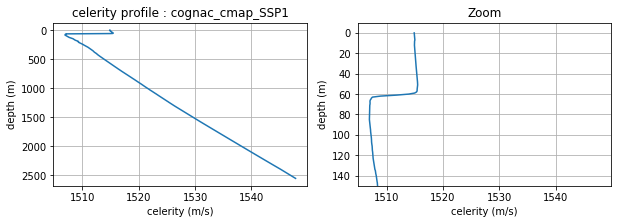

In [3]:
issp=0   # sound speed profile number
s.plotssp('mediterrannee', Issp=issp)

# Full arrival calculations on this profile

- *Bathymetry* : flat bottom at 2000 m depth

- *Source* : one source at 100m depth at range 0km

- *Receivers* : **Depth** : every 1m from 0 to 500m depth    /    **Range** : every 10m from 0 to 10 km 

In [5]:
# Generate .env file A

s.params['file_type'] = 'A'           # 'A' : arrivals time and amplitude file (.arr)
s.params['zs'] = 100.                 # source depth
s.params['ALimites'] = [-90.0, 90.0]  # limit angles

s.params['NDepth'] = 501              # number of receiver depths
s.params['zmin'] = 0.                 # minimum depth (m)
s.params['zmax'] = 500.               # maximum depth (m) (unuseful if NDepth=1)
                 

s.params['NRange'] = 10001            # number of receiver range    
s.params['rmin'] = 0.                 # minimum range (km)
s.params['rmax'] = 100.               # maximum range (km) (unuseful if NRange=1)            

s.params['zbox'] = 2500.              # box depth limit 
s.params['rbox'] = 101.               # box range limit 

s.generate_envfile('mediterrannee',file_env = s.params['name']+'_A.env', Issp=issp, SSP_depth_step=10)


Output file is : cognac_cmap_A.env


In [ ]:
Arr, Pos = s.read_arrivals_asc ('files_arr/cognac_2000m_test_A_full.arr', Narrmx = 15)

In [ ]:
Nsd = np.shape(Pos['s']['depth'])[0]
Nrd = np.shape(Pos['r']['depth'])[0]
Nrr = np.shape(Pos['r']['range'])[0]

print('number of source depths   : Nsd = ', Nsd)
print('number of receiver depths : Nrd = ', Nrd)
print('number of receiver ranges : Nrr = ', Nrr)

# Error dC between real and equivalent celerities

In [ ]:
# error dc for all sources (only one here) and all receivers

s.params['file_type'] = 'E'          # 'E' : Eigenrays (.ray)
s.params['NDepth'] = 1               # number of receiver depths
s.params['NRange'] = 1               # number of receiver range   
s.params['NBeams'] = 20000           # number of beams (if 0, bellhop choose automatically)

dC = np.zeros( (Nrr, Nrd, Nsd) )

for isd1 in range (Nsd):
    print('source number : ', isd1)
    for ird1 in range (490, Nrd) :    # /!\ Remove 490 when it is sure that everything is ok !!
        #print('%d/%d' %(ird1,Nrd))
        for irr1 in range (Nrr) :
            Narr = int(Arr['Narr'][irr1, ird1, isd1])
            if not Narr ==0 :
                
                
                # Generate .env file E
                s.params['zmin'] = Pos['r']['depth'][ird1]          # receiver depth (m)
                s.params['rmin'] = Pos['r']['range'][irr1]/1000.    # receiver range (km)          
                s.generate_envfile('mediterrannee', file_env = s.params['name']+'_E.env', \
                                   Issp=issp, SSP_depth_step=10)
                
                ### TO DO
                # execute bellhop to obtain .ray (os.system ??)
                # dictE from s.plotE (with plot=False)
                # link between A and E (idx_E)
                # real celerity and equivalent one
                # diff of amplitude max
                

In [ ]:
# PLOT 

#isd = 0    # source number (only 1 source here)
#R = Pos['r']['range']
#Z = Pos['r']['depth']
#plt.pcolormesh(R, Z, DX[:,:,isd].T, cmap='jet')
#plt.title ('dx = time(amplitude max) - first arrival')
#plt.xlabel("range (m)")
#plt.ylabel("depth (m)")
#cbar = plt.colorbar()
#cbar.set_label("dx(m)")
#plt.clim ([0,100])
#plt.gca().invert_yaxis()

In [41]:
#os.system('bellhop.exe /home1/homedir5/perso/mponchar/Cognac_Acoustique/Bellhop/cmap_E_TT')

0

# Annexe : Choice of NBeams for Eigenrays

In [38]:
# Generate .env file E

s.params['file_type'] = 'E'           # 'E' : Eigenrays (.ray)

s.params['NDepth'] = 1                # number of receiver depths
s.params['zmin'] = 500.               # minimum depth (m)
#s.params['zmax'] = 501.               # maximum depth (m) (unuseful if NDepth=1)
                 

s.params['NRange'] = 1                # number of receiver range    
s.params['rmin'] = 10.                # minimum range (km)
#s.params['rmax'] = 101.                # maximum range (km) (unuseful if NRange=1)            

s.params['NBeams'] = 20000           # number of beams (if 0, bellhop choose automatically)

s.generate_envfile('mediterrannee', file_env = s.params['name']+'_E_TT.env', \
                   Issp=issp, SSP_depth_step=50)


Output file is : cognac_cmap_E_TT.env


Le fichier E contient 47 rayons.


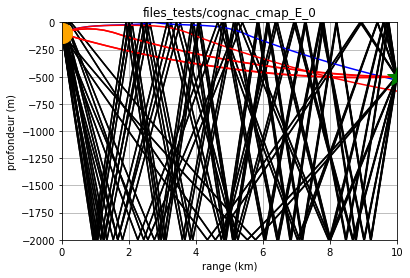

In [35]:
# eigenray plot
dictE = s.plotE ('files_tests/cognac_cmap_E_0.ray')

plt.plot (0., -s.params['zs'], color='orange', marker='o', markersize=20, label = 'source')
plt.plot (s.params['rmin'], -s.params['zmin'], color='green', marker='*', markersize=20, label = 'receiver')
#plt.ylim (ymin=-550,ymax=-450)
#plt.xlim (xmin=9.9,xmax=10.1)

print('Le fichier E contient %d rayons.' %np.shape(dictE['SrcAngle'])[0])

Le fichier E contient 44 rayons.


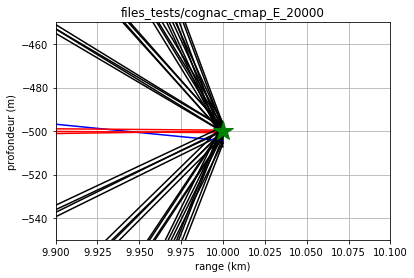

In [36]:
# eigenray plot
dictE = s.plotE ('files_tests/cognac_cmap_E_20000.ray')

plt.plot (0., -s.params['zs'], color='orange', marker='o', markersize=20, label = 'source')
plt.plot (s.params['rmin'], -s.params['zmin'], color='green', marker='*', markersize=20, label = 'receiver')
plt.ylim (ymin=-550,ymax=-450)
plt.xlim (xmin=9.9,xmax=10.1)

print('Le fichier E contient %d rayons.' %np.shape(dictE['SrcAngle'])[0])

Le fichier E contient 46 rayons.


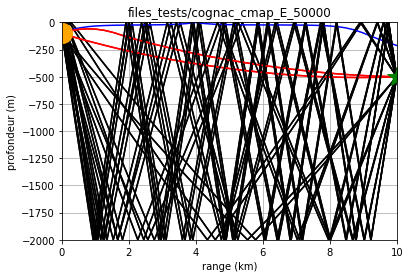

In [18]:
# eigenray plot
dictE = s.plotE ('files_tests/cognac_cmap_E_50000.ray')

plt.plot (0., -s.params['zs'], color='orange', marker='o', markersize=20, label = 'source')
plt.plot (s.params['rmin'], -s.params['zmin'], color='green', marker='*', markersize=20, label = 'receiver')
#plt.ylim (ymin=-550,ymax=-450)
#plt.xlim (xmin=9.9,xmax=10.1)

print('Le fichier E contient %d rayons.' %np.shape(dictE['SrcAngle'])[0])

Le fichier E contient 46 rayons.


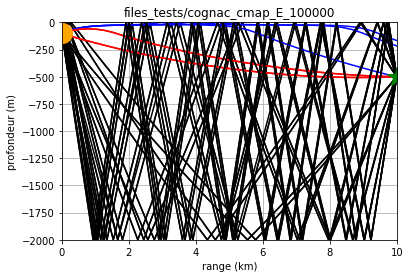

In [20]:
# eigenray plot
dictE = s.plotE ('files_tests/cognac_cmap_E_100000.ray')

plt.plot (0., -s.params['zs'], color='orange', marker='o', markersize=20, label = 'source')
plt.plot (s.params['rmin'], -s.params['zmin'], color='green', marker='*', markersize=20, label = 'receiver')
#plt.ylim (ymin=-550,ymax=-450)
#plt.xlim (xmin=9.9,xmax=10.1)

print('Le fichier E contient %d rayons.' %np.shape(dictE['SrcAngle'])[0])

Le fichier E contient 47 rayons.


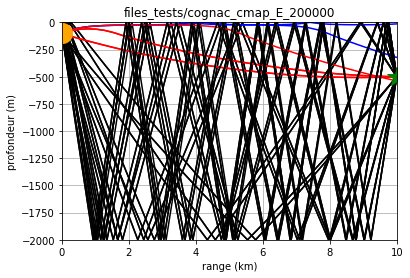

In [21]:
# eigenray plot
dictE = s.plotE ('files_tests/cognac_cmap_E_200000.ray')

plt.plot (0., -s.params['zs'], color='orange', marker='o', markersize=20, label = 'source')
plt.plot (s.params['rmin'], -s.params['zmin'], color='green', marker='*', markersize=20, label = 'receiver')
#plt.ylim (ymin=-550,ymax=-450)
#plt.xlim (xmin=9.9,xmax=10.1)

print('Le fichier E contient %d rayons.' %np.shape(dictE['SrcAngle'])[0])